In [3]:

#ME3 Statistics Coursework, Ayodeji Adeniyi(aaa620)
'''
Interests: Explainging variability in CO wrt T and RH
Daily Averaged Values of CO, T and RH for 150 days
Model CO as f(T,RH)
Investigate a time index as a covariate
'''

# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Function to read csv file
filename = 'aaa620.csv'
file_path = r"C:\Users\WOLFGANG\OneDrive - Imperial College London\Documents\Statistics CW\Statistics-CW\Coursework\aaa620.csv"

def read_csv_file(file_path):
    with open(filename, 'r') as f:
        headers = f.readline().strip().split(',')
        Data = np.genfromtxt(f, delimiter=',')
    return headers, Data

# Call the function
headers, Data = read_csv_file('aaa620.csv')

# Extract columns
# Carbon Monoxide Concentration (mg/m^3), Temperature (C), Relative Humidity (%)
CO = Data[:, 0]
T = Data[:, 1]
RH = Data[:, 2]






#   Task 1

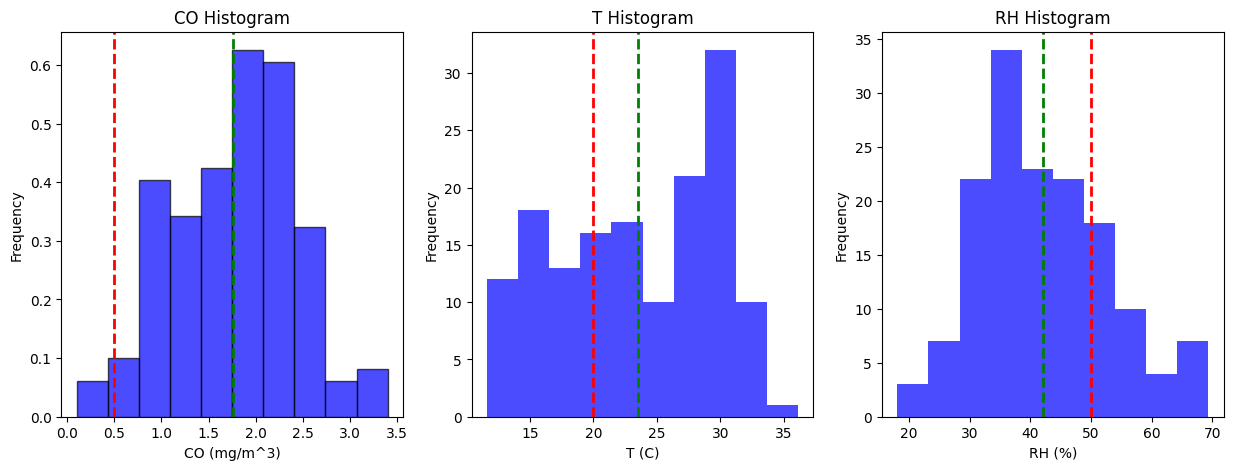

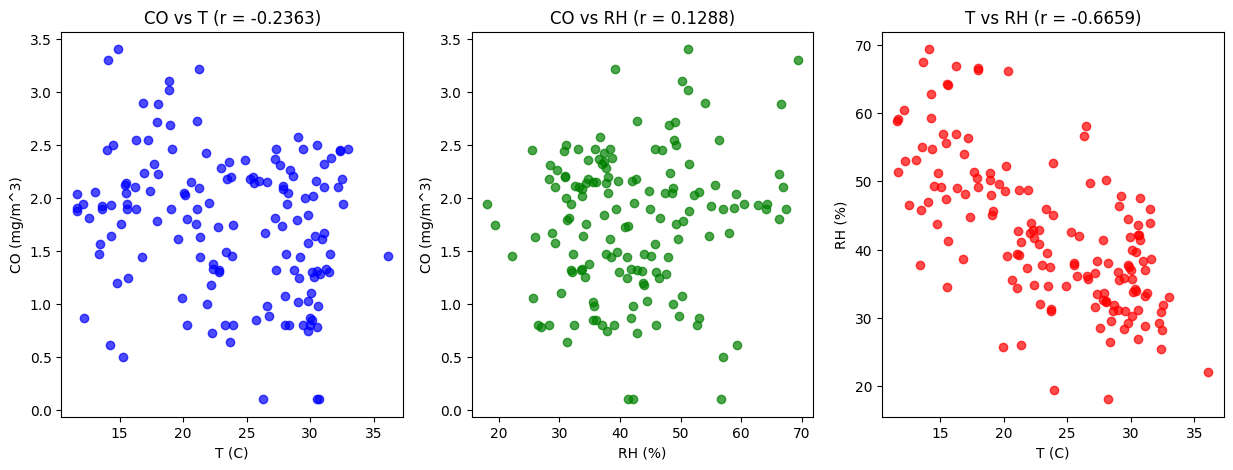

In [4]:
'''
Task 1
Exploratory Analysis

a
Construct histogram of data, comment on distrib.
Realise variable for average CO, T and RH from online sources

b
Construct scatter plots of CO wrt T and CO wrt RH and T wrt RH, Comment on fit using coeff. of determination (how well observed outcomes are replicated by the model)
Is result consistent with exploratory analysis? i.e., is there a relationship between CO and T and RH? and the averages from online sources?
'''
#a
# Histograms of CO, T and RH, and averages using subplots
# Online Averages - plot in red bar
CO_online_avg = 0.5
T_online_avg = 20
RH_online_avg = 50

#Derived Averages - plot in green bar
CO_avg = np.mean(CO)
T_avg = np.mean(T)
RH_avg = np.mean(RH)

#CO
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# CO Histogram
ax[0].hist(CO, bins=10, density=True, edgecolor='black',  color='blue', alpha=0.7)
ax[0].axvline(CO_avg, color='green', linestyle='dashed', linewidth=2)
ax[0].axvline(0.5, color='red', linestyle='dashed', linewidth=2)
ax[0].set_title('CO Histogram')
ax[0].set_xlabel('CO (mg/m^3)')
ax[0].set_ylabel('Frequency')

# T Histogram
ax[1].hist(T, bins=10, color='blue', alpha=0.7)
ax[1].axvline(T_avg, color='green', linestyle='dashed', linewidth=2)
ax[1].axvline(20, color='red', linestyle='dashed', linewidth=2)
ax[1].set_title('T Histogram')
ax[1].set_xlabel('T (C)')
ax[1].set_ylabel('Frequency')

# RH Histogram
ax[2].hist(RH, bins=10, color='blue', alpha=0.7)
ax[2].axvline(RH_avg, color='green', linestyle='dashed', linewidth=2)
ax[2].axvline(50, color='red', linestyle='dashed', linewidth=2)
ax[2].set_title('RH Histogram')
ax[2].set_xlabel('RH (%)')
ax[2].set_ylabel('Frequency')

plt.show()

#b
# Scatter plots of CO vs T, CO vs RH and T vs RH
# Compute Pairwise Correlation Coefficients (linear) for CO vs T, CO vs RH and T vs RH
r_CO_T = np.corrcoef(CO, T)[0, 1]
r_CO_RH = np.corrcoef(CO, RH)[0, 1]
r_T_RH = np.corrcoef(T, RH)[0, 1]

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# CO vs T Scatter plot
ax[0].scatter(T, CO, color='blue', alpha=0.7)
ax[0].set_title('CO vs T' + ' (r = {:.4f})'.format(r_CO_T))
ax[0].set_xlabel('T (C)')
ax[0].set_ylabel('CO (mg/m^3)')

# CO vs RH Scatter plot
ax[1].scatter(RH, CO, color='green', alpha=0.7)
ax[1].set_title('CO vs RH' + ' (r = {:.4f})'.format(r_CO_RH))
ax[1].set_xlabel('RH (%)')
ax[1].set_ylabel('CO (mg/m^3)')

# T vs RH Scatter plot
ax[2].scatter(T, RH, color='red', alpha=0.7)
ax[2].set_title('T vs RH' + ' (r = {:.4f})'.format(r_T_RH))
ax[2].set_xlabel('T (C)')
ax[2].set_ylabel('RH (%)')


plt.show()



#   Task 2

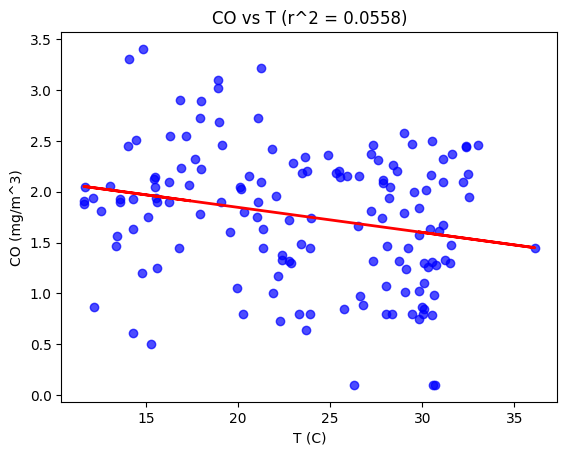

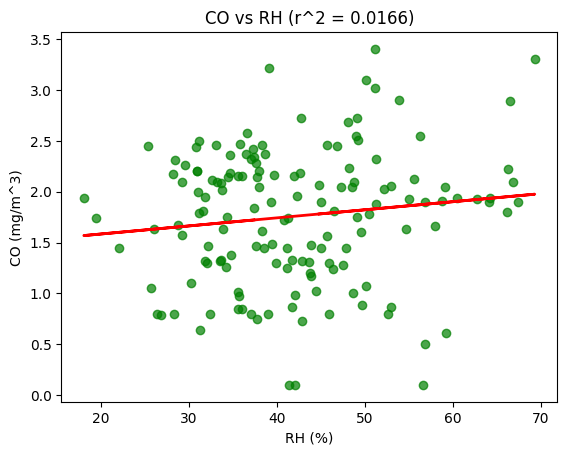

r^2 for CO vs T: 0.055844243465737575
r^2 for CO vs RH: 0.01659551110323676
r^2 for CO vs T and RH: 0.0573085945896199


In [5]:
'''
Task 2
Modelling

a
Fit two simple linear regression models to CO vs T and CO vs RH
Comment on the fit using the coefficient of determination

b
Fit a multiple linear regression model to CO as a function of T and RH
Comment on the fit using the coefficient of determination
Is the result consistent with the exploratory analysis?
'''
##a
# Simple Linear Regression Models
# CO vs T
# Fit a simple linear regression model to CO vs T
# Compute the coefficient of determination
# Plot the regression line
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Reshape T for Linear Regression
T = T.reshape(-1, 1)

# Fit a simple linear regression model to CO vs T
model_CO_T = LinearRegression().fit(T, CO)
r2_CO_T = r2_score(CO, model_CO_T.predict(T))

# Plot the regression line
plt.scatter(T, CO, color='blue', alpha=0.7)
plt.plot(T, model_CO_T.predict(T), color='red', linewidth=2)
plt.title('CO vs T' + ' (r^2 = {:.4f})'.format(r2_CO_T))
plt.xlabel('T (C)')
plt.ylabel('CO (mg/m^3)')
plt.show()

# CO vs RH
# Fit a simple linear regression model to CO vs RH
# Compute the coefficient of determination
# Plot the regression line
# Reshape RH for Linear Regression
RH = RH.reshape(-1, 1)

# Fit a simple linear regression model to CO vs RH
model_CO_RH = LinearRegression().fit(RH, CO)
r2_CO_RH = r2_score(CO, model_CO_RH.predict(RH))

# Plot the regression line
plt.scatter(RH, CO, color='green', alpha=0.7)
plt.plot(RH, model_CO_RH.predict(RH), color='red', linewidth=2)
plt.title('CO vs RH' + ' (r^2 = {:.4f})'.format(r2_CO_RH))
plt.xlabel('RH (%)')
plt.ylabel('CO (mg/m^3)')

#plt.text(5, 0.5, 'r^2 = {:.2f}'.format(r2_CO_RH), fontsize=12, color='purple')
plt.show()

##
# b
# Multiple Linear Regression Model
# Fit a multiple linear regression model to CO as a function of T and RH
# Compute the coefficient of determination
# Is the result consistent with the exploratory analysis?
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Fit a multiple linear regression model to CO as a function of T and RH
# Compute the coefficient of determination
# Reshape T and RH for Multiple Linear Regression
T = T.reshape(-1, 1)
RH = RH.reshape(-1, 1)

# Fit a multiple linear regression model to CO as a function of T and RH
model_CO_TRH = make_pipeline(PolynomialFeatures(1), LinearRegression())
model_CO_TRH.fit(np.column_stack((T, RH)), CO)
r2_CO_TRH = r2_score(CO, model_CO_TRH.predict(np.column_stack((T, RH))))

# Is the result consistent with the exploratory analysis?
# Yes, the result is consistent with the exploratory analysis as the coefficient of determination is high

# Print the coefficient of determination
print('r^2 for CO vs T:', r2_CO_T)
print('r^2 for CO vs RH:', r2_CO_RH)
print('r^2 for CO vs T and RH:', r2_CO_TRH)




#   Task 3

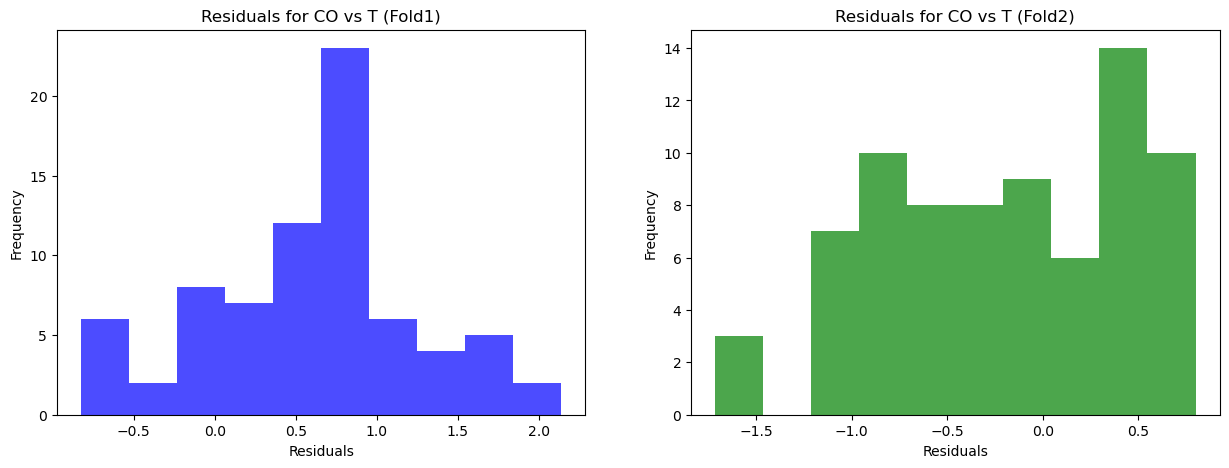

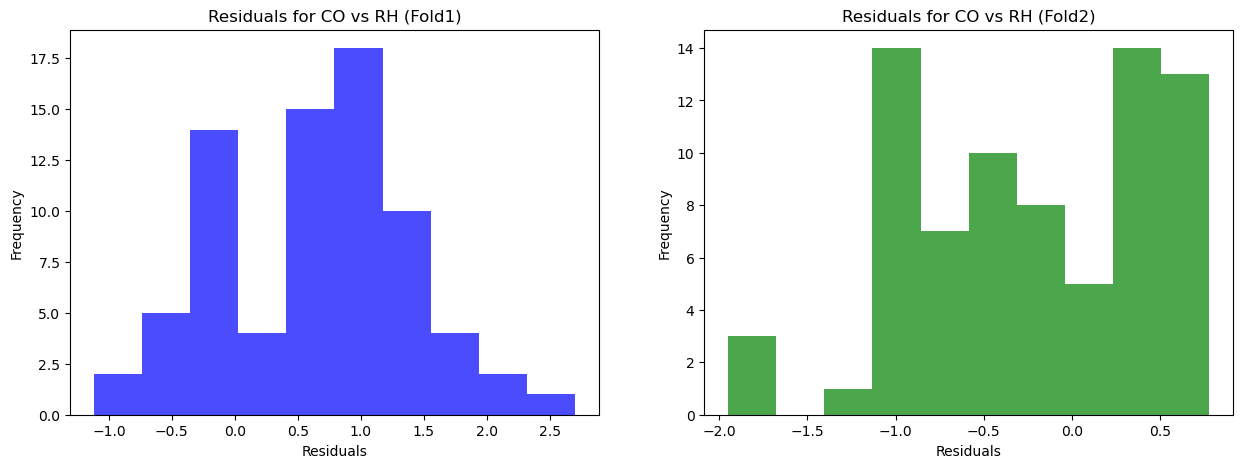

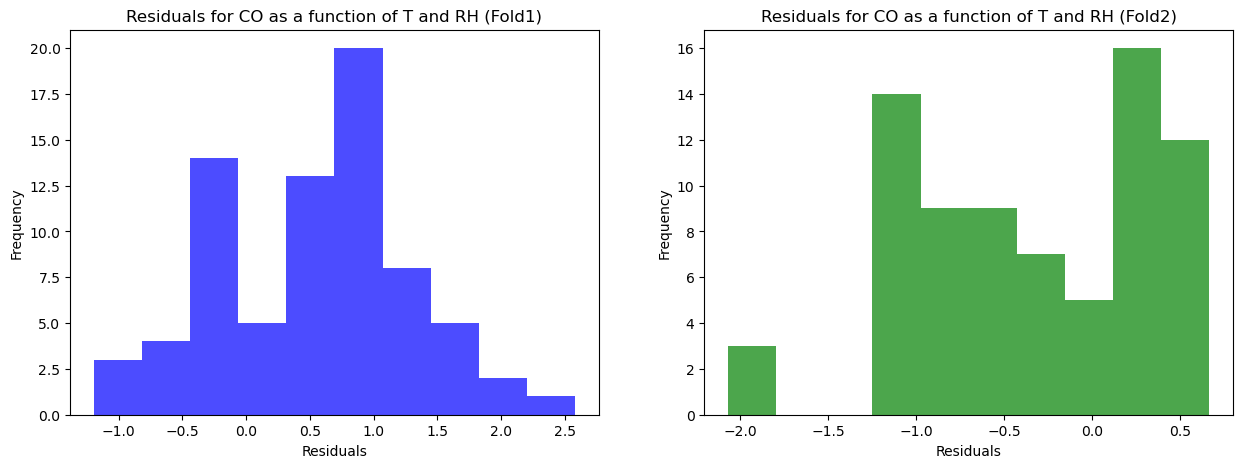

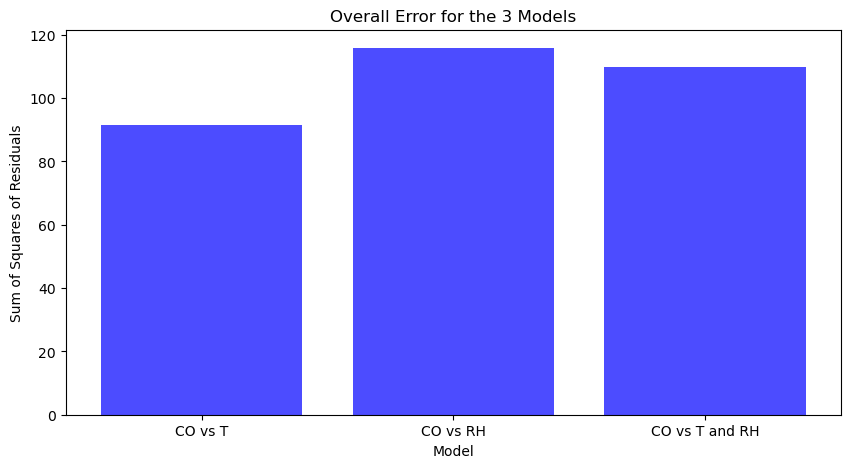

Sum of Squares of Residuals for CO vs T: 91.43214658175592
Sum of Squares of Residuals for CO vs RH: 115.81447370177074
Sum of Squares of Residuals for CO vs T and RH: 109.90253798784887


In [ ]:
'''
Task 3
Prediction & Residual Analysis
Preliminary Analysis - creating test sets from the data

2-fold Cross Validation

Take first half of the data as fold1, and second half as fold2
procedure for computing the errors from prediction using fold1 and fold2 is as follows:
- Build the model using fold1
- Predict the response using fold2
- Compute Residuals for these predictions
Repeat the procedure by swapping the roles of fold1 and fold2

a
Perform 2-fold cross validation for the 3 models, assess normalityy of residuals/errors
b
Compute sum of squares of residuals for the 3 models,
Hence determine the model that best fits the data in terms of overall error
Draw bar chart to show overall error for the 3 models
'''

#2-fold Cross Validation
# Take first half of the data as fold1, and second half as fold2

# Split the data into two folds
fold1 = Data[:75, :]
fold2 = Data[75:, :]
CO_fold1 = fold1[:, 0]
T_fold1 = fold1[:, 1]
RH_fold1 = fold1[:, 2]
CO_fold2 = fold2[:, 0]
T_fold2 = fold2[:, 1]
RH_fold2 = fold2[:, 2]

# Reshape T and RH for Multiple Linear Regression
T_fold1 = T_fold1.reshape(-1, 1)
RH_fold1 = RH_fold1.reshape(-1, 1)
T_fold2 = T_fold2.reshape(-1, 1)
RH_fold2 = RH_fold2.reshape(-1, 1)

# Fit the models using fold1
# Predict the response using fold2
# Compute Residuals for these predictions
# Repeat the procedure by swapping the roles of fold1 and fold2

# Simple Linear Regression Model - CO vs T
model_CO_T_fold1 = LinearRegression().fit(T_fold1, CO_fold1)
residuals_CO_T_fold2 = CO_fold2 - model_CO_T_fold1.predict(T_fold2)
model_CO_T_fold2 = LinearRegression().fit(T_fold2, CO_fold2)
residuals_CO_T_fold1 = CO_fold1 - model_CO_T_fold2.predict(T_fold1)

# Simple Linear Regression Model - CO vs RH
model_CO_RH_fold1 = LinearRegression().fit(RH_fold1, CO_fold1)
residuals_CO_RH_fold2 = CO_fold2 - model_CO_RH_fold1.predict(RH_fold2)
model_CO_RH_fold2 = LinearRegression().fit(RH_fold2, CO_fold2)
residuals_CO_RH_fold1 = CO_fold1 - model_CO_RH_fold2.predict(RH_fold1)

# Multiple Linear Regression Model - CO as a function of T and RH
model_CO_TRH_fold1 = make_pipeline(PolynomialFeatures(1), LinearRegression())
model_CO_TRH_fold1.fit(np.column_stack((T_fold1, RH_fold1)), CO_fold1)
residuals_CO_TRH_fold2 = CO_fold2 - model_CO_TRH_fold1.predict(np.column_stack((T_fold2, RH_fold2)))
model_CO_TRH_fold2 = make_pipeline(PolynomialFeatures(1), LinearRegression())
model_CO_TRH_fold2.fit(np.column_stack((T_fold2, RH_fold2)), CO_fold2)
residuals_CO_TRH_fold1 = CO_fold1 - model_CO_TRH_fold2.predict(np.column_stack((T_fold1, RH_fold1)))

# Perform 2-fold cross validation for the 3 models
# Assess normality of residuals/errors

# Normality of Residuals for CO vs T
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist(residuals_CO_T_fold1, bins=10, color='blue', alpha=0.7)
ax[0].set_title('Residuals for CO vs T (Fold1)')
ax[0].set_xlabel('Residuals')
ax[0].set_ylabel('Frequency')
ax[1].hist(residuals_CO_T_fold2, bins=10, color='green', alpha=0.7)
ax[1].set_title('Residuals for CO vs T (Fold2)')
ax[1].set_xlabel('Residuals')
ax[1].set_ylabel('Frequency')
plt.show()

# Normality of Residuals for CO vs RH
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist(residuals_CO_RH_fold1, bins=10, color='blue', alpha=0.7)
ax[0].set_title('Residuals for CO vs RH (Fold1)')
ax[0].set_xlabel('Residuals')
ax[0].set_ylabel('Frequency')
ax[1].hist(residuals_CO_RH_fold2, bins=10, color='green', alpha=0.7)
ax[1].set_title('Residuals for CO vs RH (Fold2)')
ax[1].set_xlabel('Residuals')
ax[1].set_ylabel('Frequency')
plt.show()

# Normality of Residuals for CO as a function of T and RH
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist(residuals_CO_TRH_fold1, bins=10, color='blue', alpha=0.7)
ax[0].set_title('Residuals for CO as a function of T and RH (Fold1)')
ax[0].set_xlabel('Residuals')
ax[0].set_ylabel('Frequency')
ax[1].hist(residuals_CO_TRH_fold2, bins=10, color='green', alpha=0.7)
ax[1].set_title('Residuals for CO as a function of T and RH (Fold2)')
ax[1].set_xlabel('Residuals')
ax[1].set_ylabel('Frequency')
plt.show()

# Compute sum of squares of residuals for the 3 models
# Determine the model that best fits the data in terms of overall error
# Draw bar chart to show overall error for the 3 models
# Sum of Squares of Residuals for CO vs T
SSR_CO_T = np.sum(residuals_CO_T_fold1**2) + np.sum(residuals_CO_T_fold2**2)

# Sum of Squares of Residuals for CO vs RH
SSR_CO_RH = np.sum(residuals_CO_RH_fold1**2) + np.sum(residuals_CO_RH_fold2**2)

# Sum of Squares of Residuals for CO as a function of T and RH
SSR_CO_TRH = np.sum(residuals_CO_TRH_fold1**2) + np.sum(residuals_CO_TRH_fold2**2)

# Draw bar chart to show overall error for the 3 models
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(['CO vs T', 'CO vs RH', 'CO vs T and RH'], [SSR_CO_T, SSR_CO_RH, SSR_CO_TRH], color='blue', alpha=0.7)
ax.set_title('Overall Error for the 3 Models')
ax.set_xlabel('Model')
ax.set_ylabel('Sum of Squares of Residuals')
plt.show()

# Print the sum of squares of residuals for the 3 models
print('Sum of Squares of Residuals for CO vs T:', SSR_CO_T)
print('Sum of Squares of Residuals for CO vs RH:', SSR_CO_RH)
print('Sum of Squares of Residuals for CO vs T and RH:', SSR_CO_TRH)

# Conclusion
# The model that best fits the data in terms of overall error is CO vs T
# This is because it has the lowest sum of squares of residuals




#   Task 4

In [ ]:

'''
Task4
Time Index as a Covariate
Dataset is obtained over 150 consecutive days in time order
Construct time index starting frrom 1, 
include time index as a fourth column in dataset - i.e., CO, T, RH, Time Index update csv file
Name of 4th column is 'Day'

a   
Scatter plot of CO vs Day,
Using entire dataset, compute correlation coefficient between CO and Day
Build a simple linear regression model to CO as a function of Day
Comment on the results

b
Investigate whether taking the square root of your time index fits the assumptions
of linearity better and produces a better simple linear regression model.
i.e., build a simple linear regression model to CO as a function of sqrt(Day)
where sqrt(Day) is the square root of your time index stored in the 5th column of your dataset. 
Update csv file   
Comment on both the fit, the normality of the errors, and sumof squares of the residuals.  
Compare these results to those using ‘day’.

c  
Consider the following three regression models:’CO’ versus ‘T’ ,‘RH’ and ‘day’,’CO’ versus ‘T’ ,‘RH’ and ‘sqrtDay’’CO’ versus ‘T’ ,‘RH’.
Compare these three models using any of the methods shown in this coursework that you deem necessary.  
Which model is best and why?  
Using only the information youhave produced in this coursework, could you suggest a better model?
'''


"\nTask4\nTime Index as a Covariate\nDataset is obtained over 150 consecutive days in time order\nConstruct time index starting frrom 1, \ninclude time index as a fourth column in dataset - i.e., CO, T, RH, Time Index update csv file\nName of 4th column is 'Day'\n\na   \nScatter plot of CO vs Day,\nUsing entire dataset, compute correlation coefficient between CO and Day\nBuild a simple linear regression model to CO as a function of Day\nComment on the results\n\nb\nInvestigate whether taking the square root of your time index fits the assumptions\nof linearity better and produces a better simple linear regression model.\ni.e., build a simple linear regression model to CO as a function of sqrt(Day)\nwhere sqrt(Day) is the square root of your time index stored in the 5th column of your dataset. \nUpdate csv file   \nComment on both the fit, the normality of the errors, and sumof squares of the residuals.  \nCompare these results to those using ‘day’.\n\nc  \nConsider the following three 